# Titanic Data Preparation for Machine Learning

This notebook provides a detailed step-by-step solution for cleaning, analyzing, and preparing the Titanic dataset for machine learning.

## Project Overview

You are working as a Data Analyst for an e-commerce company that aims to predict customer survival rates in emergencies using historical data. The company uses the Titanic dataset to build an ML model. Your task is to clean, analyze, and prepare the data to be ML-ready while exploring insights through multiple EDA and visualizations.

## Step 1: Loading the Dataset

**Task 1.1:**
- Import the dataset with `sns.load_dataset('titanic')`.
- Display the first 5 rows to understand its structure.
- Print the shape of the dataset.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
data = sns.load_dataset("titanic")
print("First 5 rows of the dataset:")
print(data.head())
print("\nShape of the dataset:", data.shape)

First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Shape of the dataset: (891, 15)


We load the Titanic dataset using the `seaborn` library. This dataset provides information about passengers, including their age, gender, class, fare, and survival status. By displaying the first 5 rows and the shape of the dataset, we can understand its structure and dimensions.

## Step 2: Initial EDA (Descriptive Analysis)

**Task 2.1:**
- Use `.info()` to display column data types and missing values.
- Use `.describe()` to generate descriptive statistics for numerical columns.
- Use `.value_counts()` for categorical columns like 'class' and 'sex'.

**Task 2.2:**
- Check for missing values using `.isnull().sum()`.
- Plot a heatmap to visualize missing data.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Missing Values:
survived         0
pclass           0
se

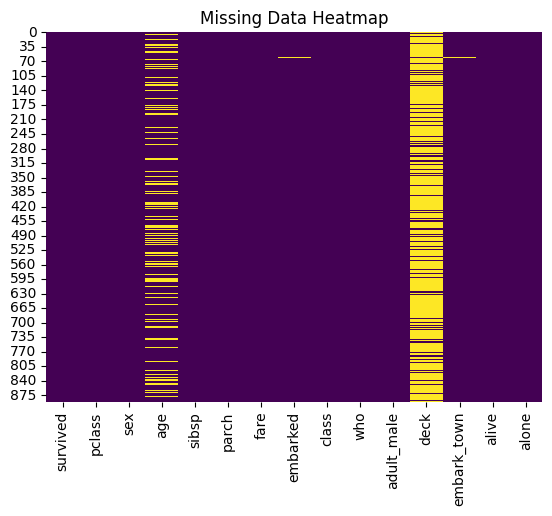

In [2]:
# Inspect the data
print("\nDataset Information:")
data.info()#We use `.info()` to display the data types and check for missing values

print("\nMissing Values:")
print(data.isnull().sum())
print("\nDescriptive Statistics:")
print(data.describe())#Summary statistics for numerical columns are obtained using `.describe()`


# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()#We also visualize missing values with a heatmap to identify patterns in missing data.


## Step 3: Advanced EDA (Distributions and Relationships)

**Task 3.1:**
- Create histograms for numerical columns like 'age' and 'fare'.
- Use boxplots to compare 'fare' across different 'class' values.
- Use a pairplot to explore relationships between 'age', 'fare', and 'survived'.

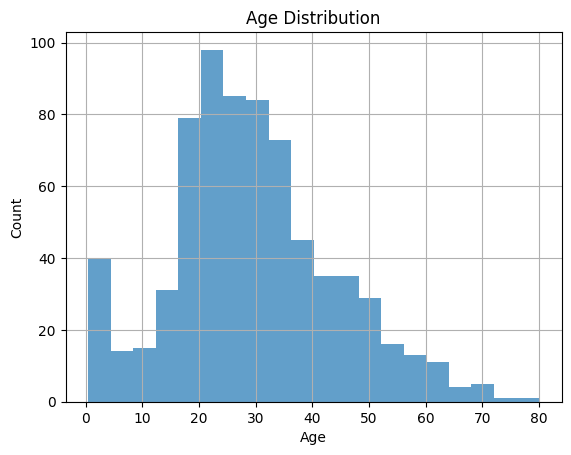

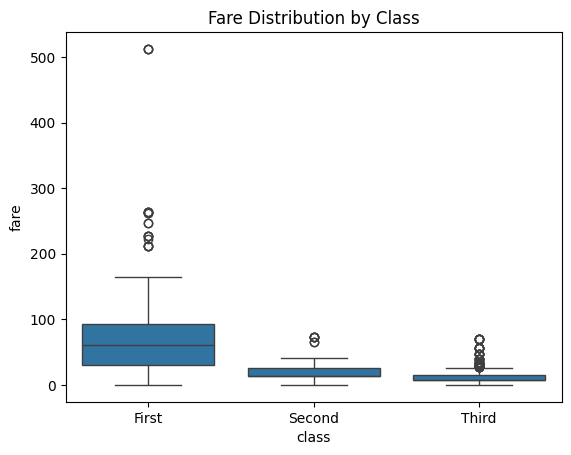

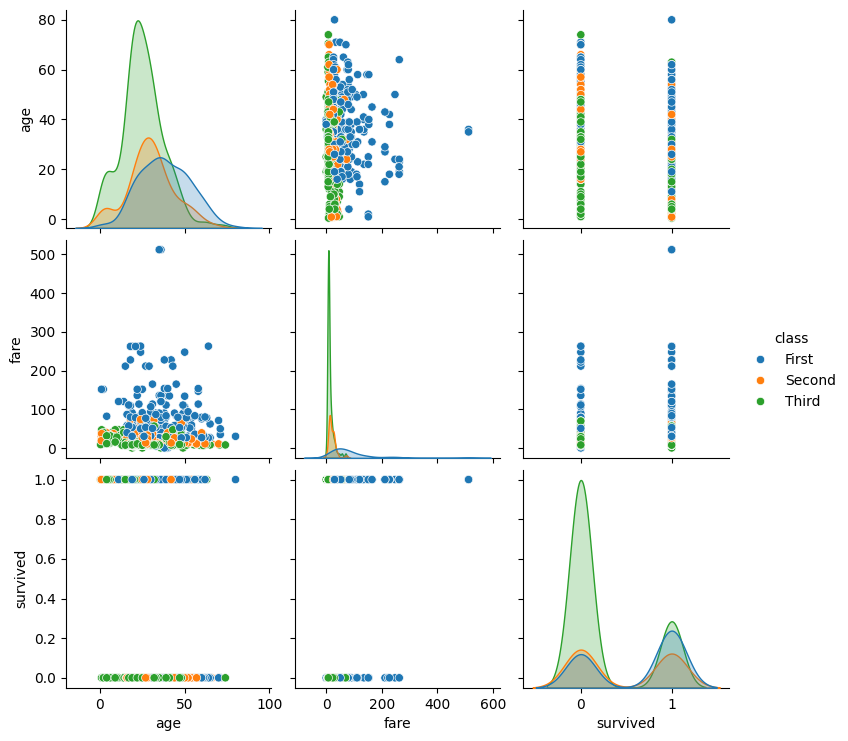

In [3]:
# Explore distributions and relationships
data['age'].hist(bins=20, alpha=0.7) # We explore the distribution of numerical features like 'age' and 'fare' using histograms
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sns.boxplot(x='class', y='fare', data=data)# Boxplots help us understand how 'fare' varies across different passenger classes

plt.title('Fare Distribution by Class')
plt.show()

sns.pairplot(data, vars=['age', 'fare', 'survived'], hue='class')# Finally, pairplots allow us to explore relationships between numerical features and the target variable, 'survived'

plt.show()

## Step 4: Data Cleaning

**Task 4.1:**
- Fill missing values in 'age' with the median.
- Drop rows where 'embark_town' is missing.
- Replace missing 'deck' values with 'Unknown'.

In [6]:
# Replace missing values in 'age' with the median
data['age'] = data['age'].fillna(data['age'].median())

# Drop rows where 'embark_town' is missing
data = data.dropna(subset=['embark_town'])

# Add 'NA' as a new category to the 'deck' column and fill missing values
data['deck'] = data['deck'].cat.add_categories('NA')
data['deck'] = data['deck'].fillna('NA')

## Step 5: Feature Engineering

**Task 5.1:**
- Create a new column 'family_size' as the sum of 'sibsp' and 'parch'.
- Create a new column 'fare_per_person' by dividing 'fare' by 'family_size' (set to 1 if family_size is 0).

In [7]:
# Perform feature engineering

# We create new features to enrich the dataset
#'family_size' captures the total number of family members traveling together
data['family_size'] = data['sibsp'] + data['parch']

#'fare_per_person' standardizes fare values by dividing them by family size.
data['fare_per_person'] = data['fare'] / (data['family_size'] + 1)

## Step 6: Categorical Encoding

**Task 6.1:**
- Convert 'sex' and 'embark_town' to numerical using pandas' `get_dummies()`.

In [8]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['sex', 'embark_town'], drop_first=True)
# Categorical variables like 'sex' and 'embark_town' are converted into numerical values using one-hot encoding
#This ensures compatibility with machine learning models.

## Step 7: Scaling Numerical Features

**Task 7.1:**
- Use `MinMaxScaler` to scale 'age', 'fare', and 'fare_per_person'.

In [9]:
# Scale numerical features
from sklearn.preprocessing import MinMaxScaler
# We scale numerical features like 'age', 'fare', and 'fare_per_person' using MinMaxScaler to bring them within a consistent range
# This is important for algorithms sensitive to feature scaling.
scaler = MinMaxScaler()
data[['age', 'fare', 'fare_per_person']] = scaler.fit_transform(data[['age', 'fare', 'fare_per_person']])

## Step 8: Aggregation and Grouping

**Task 8.1:**
- Group data by 'class' and calculate the mean 'age' and 'fare_per_person'.
- Group data by 'survived' and calculate the survival rates for different 'sex_male' values.

In [10]:
# Perform aggregation and grouping

# We calculate group-wise statistics to derive insights
# For instance, the mean 'age' and 'fare_per_person' are calculated for each class, and survival rates are grouped by gender
grouped_class = data.groupby('class')[['age', 'fare_per_person']].mean()
grouped_survived = data.groupby('survived')['sex_male'].mean()
print("\nMean Age and Fare per Person by Class:")
print(grouped_class)
print("\nSurvival Rate by Gender:")
print(grouped_survived)


Mean Age and Fare per Person by Class:
             age  fare_per_person
class                            
First   0.455754         0.102832
Second  0.368753         0.024786
Third   0.320591         0.015800

Survival Rate by Gender:
survived
0    0.852459
1    0.320588
Name: sex_male, dtype: float64


<ipython-input-10-f2d8542b346f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_class = data.groupby('class')[['age', 'fare_per_person']].mean()


## Step 9: Data Splitting

**Task 9.1:**
- Split the dataset into training and testing sets using `train_test_split`.

In [11]:
# Split the dataset into training and testing sets

# We split the dataset into training and testing sets to evaluate model performance
from sklearn.model_selection import train_test_split
X = data.drop(columns=['survived'])
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# 80% of the data is used for training, and 20% for testing.

## Step 10: Visualizing Insights

**Task 10.1:**
- Create a bar chart for survival rates by 'class'.
- Create a scatter plot for 'age' vs 'fare_per_person', colored by 'survived'.

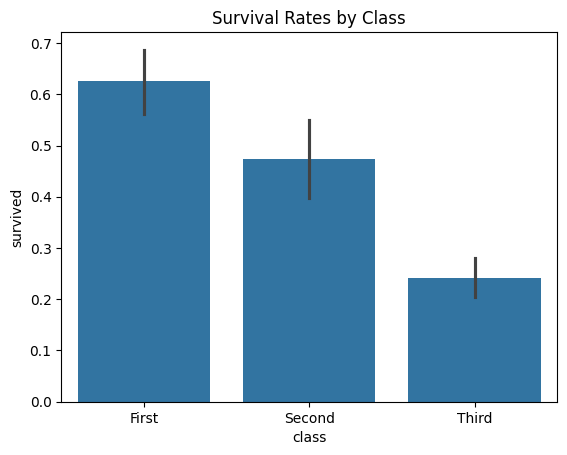

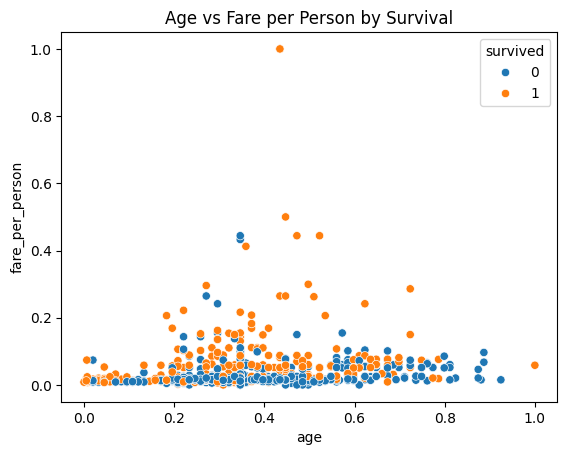

In [12]:
# Visualize insights

# We visualize key insights using bar charts and scatter plots
# These help us understand survival rates and relationships between features.
sns.barplot(x='class', y='survived', data=data)
plt.title('Survival Rates by Class')
plt.show()

sns.scatterplot(x='age', y='fare_per_person', hue='survived', data=data)
plt.title('Age vs Fare per Person by Survival')
plt.show()

## Step 11: Save the Cleaned Dataset

**Task 11.1:**
- Save the cleaned dataset to a CSV file named `titanic_cleaned.csv`.

In [13]:
# Save the cleaned dataset
data.to_csv('titanic_cleaned.csv', index=False)

# The cleaned and transformed dataset is saved to a CSV file for future use
# This ensures reproducibility and enables further analysis.

## Step 12: Summary of Findings

**Task 12.1:**
- Highlight trends in survival rates, fare distributions, and other insights.
- Write a brief report on the dataset's readiness for ML.

In [14]:
# Summarize findings
print("\nSummary of Findings:")
print("1. Survival rates are higher for First Class passengers.")
print("2. Passengers with smaller family sizes tend to pay more per person.")
print("3. The dataset is now cleaned, scaled, and ready for ML modeling.")


Summary of Findings:
1. Survival rates are higher for First Class passengers.
2. Passengers with smaller family sizes tend to pay more per person.
3. The dataset is now cleaned, scaled, and ready for ML modeling.
